In [335]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.utils import shuffle
import sklearn
from keras import backend as K
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [316]:
df=pd.read_csv('musk_csv.csv')

In [317]:
df.tail(35)

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
6563,6564,NON-MUSK-jp13,jp13_1+6,51,-122,-23,33,-117,-112,-163,...,-283,-211,-14,-30,107,171,-44,-115,118,0
6564,6565,NON-MUSK-jp13,jp13_1+7,51,-123,-23,-41,-117,-95,-163,...,-287,-212,-14,-28,108,172,-44,-115,119,0
6565,6566,NON-MUSK-jp13,jp13_1+8,44,-104,-19,-47,-117,-86,-168,...,-268,-202,-9,150,129,158,-66,-144,-4,0
6566,6567,NON-MUSK-jp13,jp13_1+9,44,-103,-19,4,-117,-90,-167,...,-269,-203,-8,150,130,158,-66,-144,-5,0
6567,6568,NON-MUSK-jp13,jp13_2+1,51,-125,-23,-113,-117,73,-161,...,-3,160,-13,-28,108,172,-44,-116,119,0
6568,6569,NON-MUSK-jp13,jp13_2+10,44,-102,-19,-105,-117,196,-166,...,38,129,-8,150,130,158,-66,-144,-5,0
6569,6570,NON-MUSK-jp13,jp13_2+11,37,-42,-126,33,-117,-96,202,...,-216,-205,-1,30,113,195,-55,-150,112,0
6570,6571,NON-MUSK-jp13,jp13_2+12,48,-127,-125,28,-117,-84,203,...,-228,-209,20,155,132,187,-72,-172,16,0
6571,6572,NON-MUSK-jp13,jp13_2+13,37,-134,-141,32,-117,-95,205,...,-236,-206,-2,30,113,196,-55,-150,114,0
6572,6573,NON-MUSK-jp13,jp13_2+14,48,-190,-140,27,-117,-82,205,...,-245,-210,17,155,131,187,-72,-172,16,0


In [318]:
df.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,6598.00000,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


In [319]:
df

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,6594,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,...,-66,164,-14,-29,107,171,-44,-115,118,0
6594,6595,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,...,-51,166,-9,150,129,158,-66,-144,-5,0
6595,6596,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,...,90,117,-8,150,130,159,-66,-144,-6,0
6596,6597,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,...,86,99,-14,-31,106,171,-44,-116,117,0


In [320]:
df.isnull().sum()

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 170, dtype: int64

In [321]:
df.dtypes

ID                    int64
molecule_name        object
conformation_name    object
f1                    int64
f2                    int64
                      ...  
f163                  int64
f164                  int64
f165                  int64
f166                  int64
class                 int64
Length: 170, dtype: object

In [322]:
len(df.molecule_name.unique())

102

In [323]:
f=df.corr()

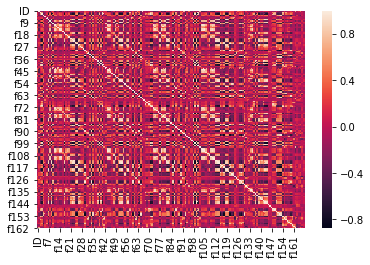

In [326]:

sns.heatmap(f)

In [343]:
df['class'].value_counts()

0    5581
1    1017
Name: class, dtype: int64

### IMBALANCED DATASET

### APPLYING UPSAMPLING of MINORITY CLASS

In [327]:
df_majority = df[df['class']==0]
df_minority = df[df['class']==1]

df_minority_upsampled4 = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=2500,    # to increase minority class
                                 random_state=123)

df_upsampled4 = pd.concat([df_majority, df_minority_upsampled4])


In [328]:
labels = df_upsampled4['class']
features = df_upsampled4.iloc[:,3:-1]

### SHUFFLING ROWS IN DATASET

In [331]:
features,labels=random.shuffle(features,labels)

In [332]:
labels

895     1
1331    0
3530    0
2642    0
112     1
       ..
528     1
3636    0
1256    0
469     1
2258    0
Name: class, Length: 8081, dtype: int64

In [333]:
features

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
895,59,-128,-25,141,-117,-77,67,11,-12,-60,...,-240,-271,-211,30,109,47,240,-66,-218,73
1331,292,-193,-144,-57,-117,50,56,-169,-40,6,...,-240,-303,56,-125,9,321,187,-54,62,-168
3530,48,-190,-140,29,-113,-86,50,37,-28,-51,...,-233,-235,-209,15,155,131,187,-72,-173,13
2642,46,-140,-113,-7,-117,-35,85,101,-105,-165,...,-236,-254,-205,-31,152,121,205,-73,-192,3
112,40,-165,-59,-69,-117,49,27,-146,-19,5,...,-242,-305,52,152,183,231,190,-41,-126,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,48,-157,-120,29,-117,-85,200,47,-33,-110,...,-238,-273,-208,21,155,131,187,-72,-172,17
3636,48,-194,-123,26,-117,-78,62,12,-23,-133,...,-247,-277,-216,13,155,130,186,-72,-171,16
1256,116,61,-86,-77,-117,11,27,-94,-22,-22,...,-239,-81,-136,34,253,291,143,-57,-116,61
469,36,-175,-158,33,-117,-96,49,40,-27,-113,...,-235,-268,-206,6,37,115,196,-55,-150,113


### SPLITTING OF OUR DATASET INTO TRAIN AND VALIDATION SET

In [336]:
xtrain,xtest,ytrain,ytest=train_test_split(features,labels,test_size=0.2)

In [337]:
xtrain.shape

(6464, 166)

In [341]:
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### BUILDING MODEL

In [338]:
model = Sequential()
model.add(Dense(128, input_dim=166, activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy',f1_m,precision_m, recall_m])
history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=30,batch_size=128,verbose=1)

Train on 6464 samples, validate on 1617 samples
Epoch 1/30
6464/6464 [==============================] - 1s 222us/sample - loss: 2.0661 - acc: 0.6327 - f1_m: 0.1434 - precision_m: 0.1169 - recall_m: 0.2307 - val_loss: 0.4623 - val_acc: 0.7007 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/30
6464/6464 [==============================] - 0s 42us/sample - loss: 0.3218 - acc: 0.8485 - f1_m: 0.7137 - precision_m: 0.6739 - recall_m: 0.7755 - val_loss: 0.2673 - val_acc: 0.8893 - val_f1_m: 0.8141 - val_precision_m: 0.8082 - val_recall_m: 0.8242
Epoch 3/30
6464/6464 [==============================] - 0s 43us/sample - loss: 0.1974 - acc: 0.9239 - f1_m: 0.8778 - precision_m: 0.8650 - recall_m: 0.8992 - val_loss: 0.1640 - val_acc: 0.9375 - val_f1_m: 0.9041 - val_precision_m: 0.8371 - val_recall_m: 0.9859
Epoch 4/30
6464/6464 [==============================] - 0s 41us/sample - loss: 0.1374 - acc: 0.9502 - f1_m: 0.9207 - precision_m: 0.9019 - recall_m: 0.9436 

In [339]:
def visualize_model(history):
    plt.figure(figsize=(24,8))
    plt.subplot(1,2,1)
    plt.plot(history.history["val_acc"],label="validation_accuracy",c="red",linewidth=4)
    plt.plot(history.history["acc"],label="training_accuracy",c="green",linewidth=4)
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1,2,2)
    plt.plot(history.history["val_loss"],label="validation loss",c="red",linewidth=4)
    plt.plot(history.history["loss"],label="training_loss",c="green",linewidth=4)
    plt.legend()
    plt.grid(True)
    plt.suptitle("ACC / LOSS",fontsize=18)

    plt.show()

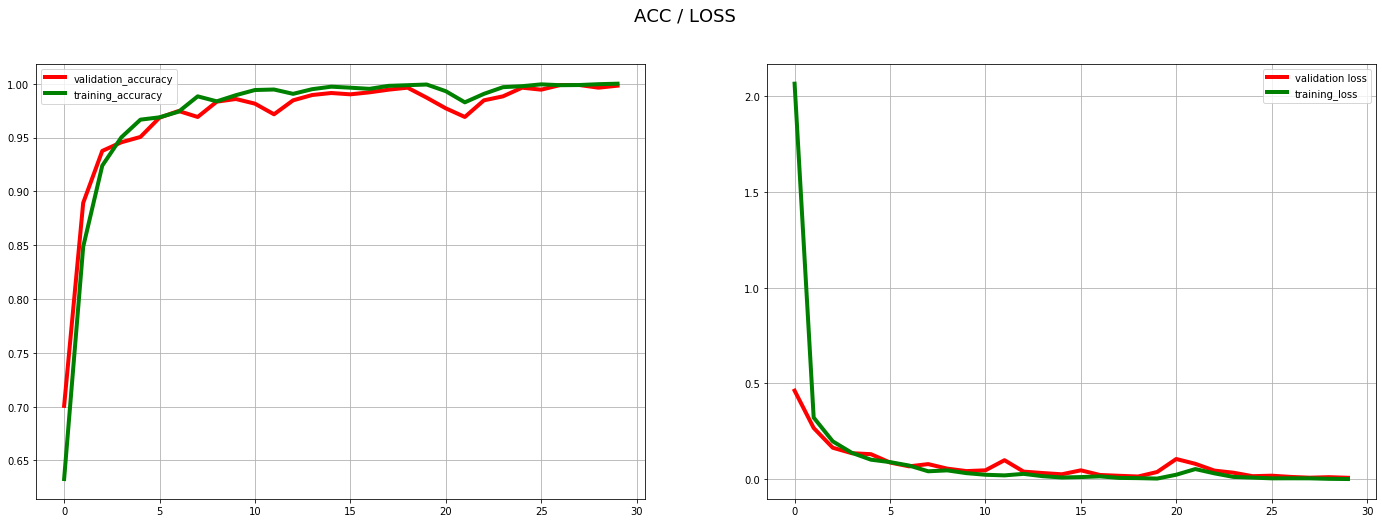

In [340]:
visualize_model(history)

In [342]:
loss, accuracy, f1_score, precision, recall = model.evaluate(xtest, ytest, verbose=1)


1617/1617 [==============================] - 0s 95us/sample - loss: 0.0071 - acc: 0.9981 - f1_m: 0.9966 - precision_m: 0.9963 - recall_m: 0.9972


In [344]:
model.save('musk.h5')

In [345]:
model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_98 (Dense)             (None, 128)               21376     
_________________________________________________________________
dense_99 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_100 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_101 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_102 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_103 (Dense)            (None, 1)                 9         
Total params: 32,385
Trainable params: 32,385
Non-trainable params: 0
_________________________________________________